In [ ]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
import re
from sklearn.metrics import silhouette_score 

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
tokenized_project = [project.split() for project in new_corpus_customsp]

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
ft_model = FastText(tokenized_project,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

In [ ]:
print(ft_model.wv['machine'])

[-0.71556646  0.61470944 -0.20879047 -0.15834242  0.10407212  0.45909795
 -0.39426613 -0.25014493 -0.52751416 -0.4838221   0.05750379  0.3349049
 -0.19040002  0.12893252  0.7972473   0.26513997 -0.4993053   0.29941836
 -0.21477632 -0.3885618  -0.14063826  0.11905469 -0.46300942  0.17251685
 -0.42154738 -0.00801599  0.70092773 -0.2704273  -0.5975051   0.3020831
  0.23153634  0.6175965   0.5020589   0.02375965  0.10997402  0.15239711
  0.29895717 -0.28583053 -0.38354397 -0.07308276 -0.02945065 -0.6552066
  0.07271113  0.2970009   0.00441001  0.09253842 -0.16322713  0.39081386
 -0.15832761  0.23657863  0.22423518  0.40662712 -0.07310609 -0.56668705
 -0.45987564 -0.19916423  0.49632302  0.19708681  0.32676664  0.4065288 ]


In [ ]:
print(ft_model.wv)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.head(100)

term    weight
0         ability  0.001135
1            able  0.004764
2   able generate  0.001147
3        academic  0.002510
4    acceleration  0.001149
..            ...       ...
95      attention  0.002771
96     attributes  0.002851
97            auc  0.001774
98      auc score  0.001236
99          audio  0.004121

[100 rows x 2 columns]

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
X=[]
for sentence in tokenized_project:
    X.append(sent_vectorizer(sentence, ft_model))   
 
print ("========================")
print (X)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Streaming output truncated to the last 5000 lines.
      dtype=float32), array([-0.825929  , -0.25162074,  0.33245957, -0.6505174 , -0.34287697,
        0.17020676, -0.1764581 ,  0.27031547, -0.50370556, -0.08170761,
       -0.0410906 ,  0.13548426,  0.31723896,  0.04302863,  0.966159  ,
        0.41736385, -0.78088367,  0.46838775,  0.30321917,  0.11501683,
       -0.7136021 , -0.06722029, -0.28720707,  0.13168435,  0.0714675 ,
       -0.4906474 ,  0.10180698,  0.39401454,  0.13588297,  0.03802436,
       -0.5764799 , -0.44444528,  0.04023446,  0.05549992, -0.08649792,
       -0.18536776, -0.06614591, -0.6655429 , -0.15466529, -0.28737095,
       -0.26347926, -0.39815676,  0.06478027,  0.59676945, -0.0287214 ,
       -0.47793382,  0.01942722,  0.19724795, -0.05963441,  0.965683  ,
       -0.09581207,  0.33845887, -0.36531535, -0.6495545 ,  0.07600617,
        0.01533862,  0.3494902 , -0.6069603 , -0.6625964 ,  0.30418268],
      dtype=float32), array([-0.9533726 , -0.16965067,  0.2748

In [ ]:
len(X)

628

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


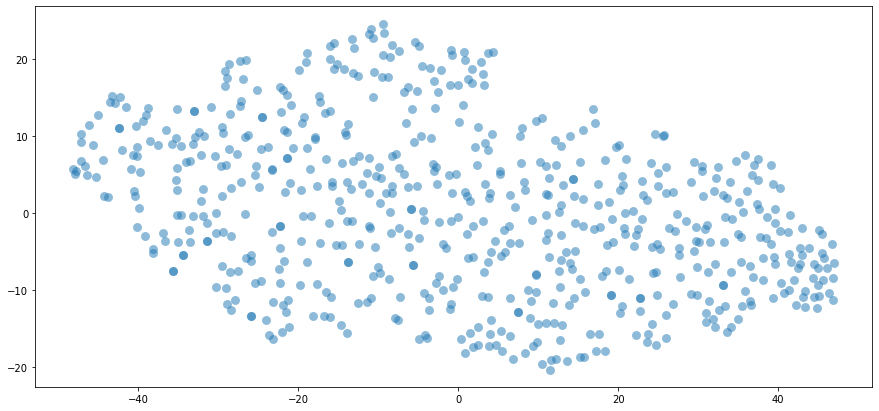

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(X, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


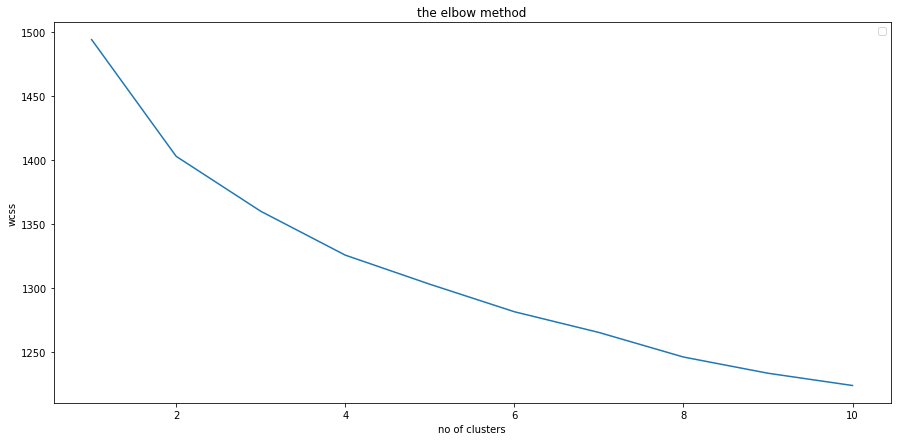

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 0 0 2 0 3 3 4 2 0 0 2 4 2 3 3 2 3 3 3 3 3 3 3 3 3 3 4 2 0 2 2 3 0 2 0
 2 3 3 2 0 0 2 2 4 0 3 2 2 2 0 0 0 0 2 3 2 0 0 0 0 3 2 1 2 4 4 0 0 0 2 4 4
 3 4 3 3 0 2 2 2 0 0 0 2 1 4 3 2 2 0 0 0 4 3 3 2 2 4 0 0 1 4 0 3 0 0 2 2 3
 2 3 1 2 0 4 4 4 2 4 4 0 2 2 1 2 1 3 4 0 0 0 2 0 0 2 3 0 4 4 4 3 1 2 0 4 0
 2 1 3 1 2 3 2 0 0 0 2 3 3 2 3 0 3 0 2 2 4 4 4 3 0 1 1 0 2 2 2 2 2 1 1 2 3
 2 2 0 4 1 2 3 2 1 1 0 2 2 2 4 0 0 2 2 3 2 4 0 2 1 2 0 3 2 0 3 4 0 0 0 1 4
 0 1 2 3 0 3 0 2 0 0 0 3 2 2 2 1 0 2 1 0 2 1 1 1 2 1 3 1 1 4 3 2 0 3 1 3 0
 3 0 4 2 2 4 1 0 2 0 2 1 2 0 0 2 2 0 0 2 3 2 1 2 2 0 2 0 0 0 1 1 0 2 4 4 0
 1 0 2 2 1 1 0 0 3 1 2 1 0 2 0 1 1 2 1 0 2 0 4 1 0 2 0 2 4 4 0 2 2 2 0 2 0
 1 2 2 1 2 2 2 2 0 0 0 2 1 0 0 2 2 3 2 0 0 3 4 3 4 0 0 0 0 0 0 3 0 0 2 2 1
 4 2 0 3 0 0 0 2 2 2 2 2 1 1 1 0 2 2 4 1 1 4 2 0 1 2 0 2 4 3 4 0 2 2 2 4 2
 0 2 3 1 2 3 2 2 1 0 0 4 1 2 2 2 3 0 3 1 2 0 2 3 1 2 2 3 0 2 2 0 1 2 2 2 1
 1 2 0 4 2 3 2 3 2 2 2 0 0 1 3 1 1 1 1 2 0 3 0 0 2 2 0 0 1 2 4 4 0 2 2 0 1
 3 3 3 0 2 4 2 2 2 2 4 2 

In [ ]:
len(y_kmeans)

628

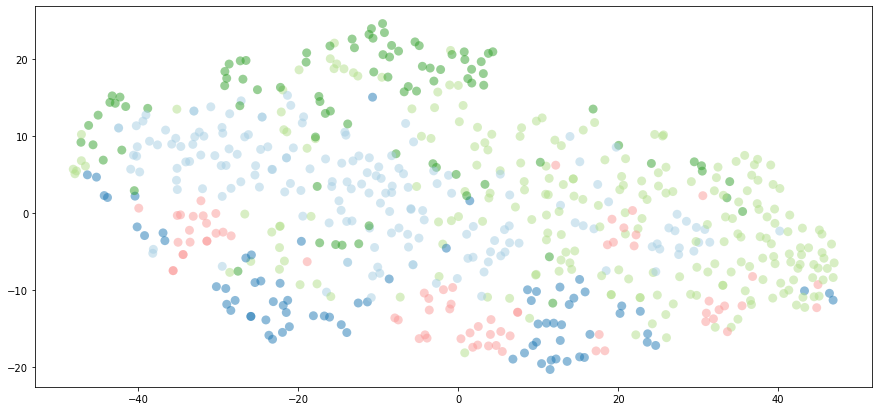

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[X] if X >= 0
                  else (0.5, 0.5, 0.5)
                  for X in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.057236336
For no of clusters = 3  The average silhouette_score is : 0.05037492
For no of clusters = 4  The average silhouette_score is : 0.04425694
For no of clusters = 5  The average silhouette_score is : 0.046170823
For no of clusters = 6  The average silhouette_score is : 0.038978413
For no of clusters = 7  The average silhouette_score is : 0.03752485
For no of clusters = 8  The average silhouette_score is : 0.035056483
For no of clusters = 9  The average silhouette_score is : 0.041991707
For no of clusters = 10  The average silhouette_score is : 0.0323762


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

170

In [ ]:
#projects in cluster 1
list1

['psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.head(100)

term    weight
0               able  0.010871
1      able generate  0.004842
2           accuracy  0.035214
3      accuracy test  0.005078
4            achieve  0.008062
..               ...       ...
95      experimented  0.005228
96         extracted  0.007209
97        extraction  0.009100
98              face  0.019611
99  face recognition  0.009087

[100 rows x 2 columns]

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of psnr is : 1
Frequency of currently is : 5
Frequency of drafting is : 2
Frequency of paperforthe is : 1
Frequency of algorithm is : 21
Frequency of reconstruction is : 4
Frequency of k is : 16
Frequency of space is : 8
Frequency of superresolution is : 1
Frequency of images is : 54
Frequency of nmri is : 1
Frequency of lot is : 3
Frequency of faster is : 6
Frequency of highly is : 2
Frequency of sub is : 4
Frequency of sampled is : 1
Frequency of knee is : 1
Frequency of mri is : 1
Frequency of forthe is : 1
Frequency of packed is : 1
Frequency of imaginary is : 1
Frequency of nand is : 2
Frequency of parts is : 4
Frequency of fourier is : 1
Frequency of accuracy is : 39
Frequency of solved is : 1
Frequency of time is : 17
Frequency of classification is : 31
Frequency of basis is : 1
Frequency of position is : 2
Frequency of camera is : 6
Frequency of flowneta is : 1
Frequency of optical is : 4
Frequency of flows is : 2
Frequency of frames is : 4
Frequency of ndetermine is 

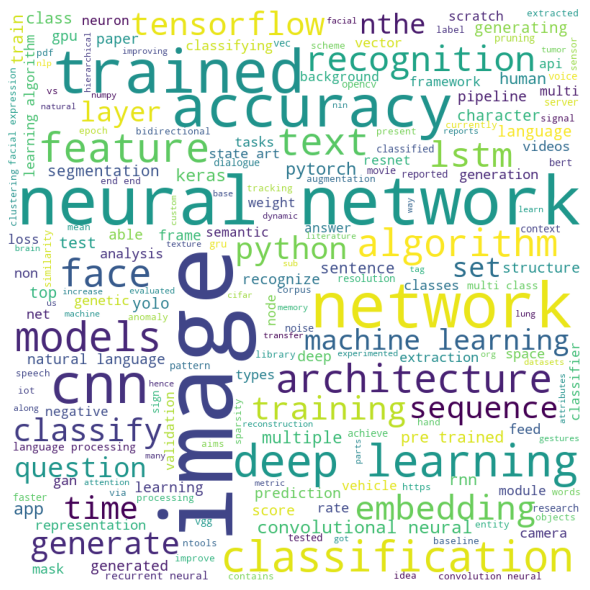

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

76

In [ ]:
list2

['conversational bot chatbot rasa framework zomato api call deployed slack main bot good discovery across several indian cities',
 'making desired call language core functionality went websites research papers dig',
 'terrain spy bot imlemented vr field view integrated computer vision features',
 'advisor sudip misra time election software features schedulers otp verification chat box interactive profiles options like mark favourite software engineering srs documentation uml state sequence class',
 'cool language including phases namely lexer parser semantic analyzer generator coursework iit hyderabad course principles fifth semester',
 'distributed database front end insert view delete patient nfragmented tables distributing state wise sqlplus oracle db php javascript w css',
 'simple naive attempt creation voice command driven interface net detects speech controlling small set functions like opening executable present limited yet fun interactive functionality jab speech recognition a

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
87      website  0.097166
3       android  0.072989
6           app  0.054935
70       server  0.053310
76     software  0.052952
86          web  0.046937
54        mysql  0.045209
41         java  0.045056
29    framework  0.043317
27     features  0.043121
46         like  0.042225
61          php  0.041113
17          css  0.039449
25          end  0.036595
5           api  0.035410
37         html  0.032851
38     html css  0.032851
81         tech  0.031461
47        linux  0.031240
42   javascript  0.031160
19     database  0.029977
62    php mysql  0.029400
16       course  0.029380
43     language  0.028959
36        helps  0.028422
49         look  0.028095
26  engineering  0.027553
65       portal  0.027037
63     platform  0.026887
80     students  0.026564

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of conversational is : 1
Frequency of bot is : 3
Frequency of chatbot is : 2
Frequency of rasa is : 1
Frequency of framework is : 11
Frequency of zomato is : 1
Frequency of api is : 9
Frequency of call is : 2
Frequency of deployed is : 1
Frequency of slack is : 1
Frequency of main is : 3
Frequency of good is : 3
Frequency of discovery is : 1
Frequency of across is : 1
Frequency of several is : 2
Frequency of indian is : 1
Frequency of cities is : 1
Frequency of making is : 2
Frequency of desired is : 1
Frequency of language is : 7
Frequency of core is : 4
Frequency of functionality is : 5
Frequency of went is : 4
Frequency of websites is : 4
Frequency of research is : 2
Frequency of papers is : 1
Frequency of dig is : 1
Frequency of terrain is : 1
Frequency of spy is : 1
Frequency of imlemented is : 1
Frequency of vr is : 2
Frequency of field is : 1
Frequency of view is : 3
Frequency of integrated is : 2
Frequency of computer is : 1
Frequency of vision is : 1
Frequency of fea

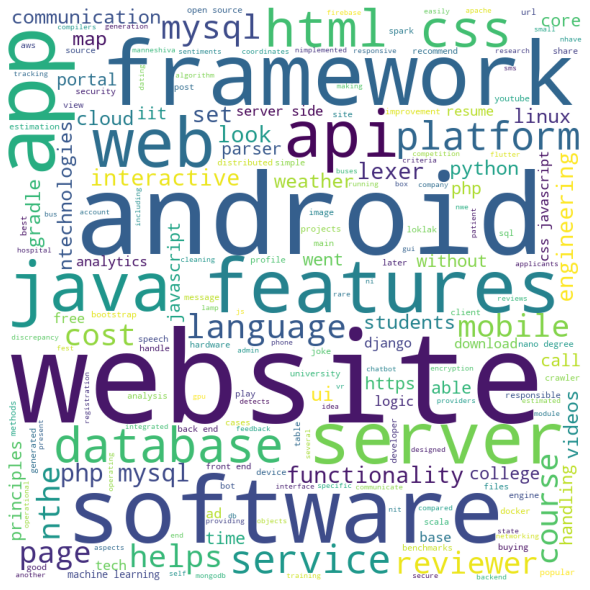

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

222

In [ ]:
list3

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
428              time  0.028731
338            python  0.027357
17           analysis  0.022126
223          learning  0.022063
227              like  0.020501
14         algorithms  0.019822
13          algorithm  0.019697
190             image  0.016622
243           machine  0.015670
144          features  0.015616
24                app  0.015257
383               set  0.014980
167              game  0.014950
281           network  0.014112
105          designed  0.013954
422              test  0.013518
225           library  0.013143
306        parameters  0.012605
143           feature  0.012521
265          modeling  0.012424
174               gui  0.011995
352    recommendation  0.011812
244  machine learning  0.011581
376             score  0.011513
334        processing  0.011160
390        similarity  0.011045
460            visual  0.010956
19            android  0.010949
426              text  0.010859
260           methods  0.010557

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 2
Frequency of duplication is : 1
Frequency of faces is : 1
Frequency of major is : 9
Frequency of challenges is : 2
Frequency of dup is : 1
Frequency of algorithm is : 25
Frequency of complexity is : 4
Frequency of means is : 1
Frequency of time is : 41
Frequency of get is : 12
Frequency of answer is : 5
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 4
Frequency of solved is : 2
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 5
Frequency of achieve is : 8
Frequency of tradeoff is : 1
Frequency of precision is : 2
Frequency of recall is : 3
Frequency of improves is : 2
Frequency of score is : 8
Frequency of machine is : 13
Frequency of learning is : 23
Frequency of collecting is : 3
Frequency of training is : 7
Frequency of analyze is : 2
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 3
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of compa

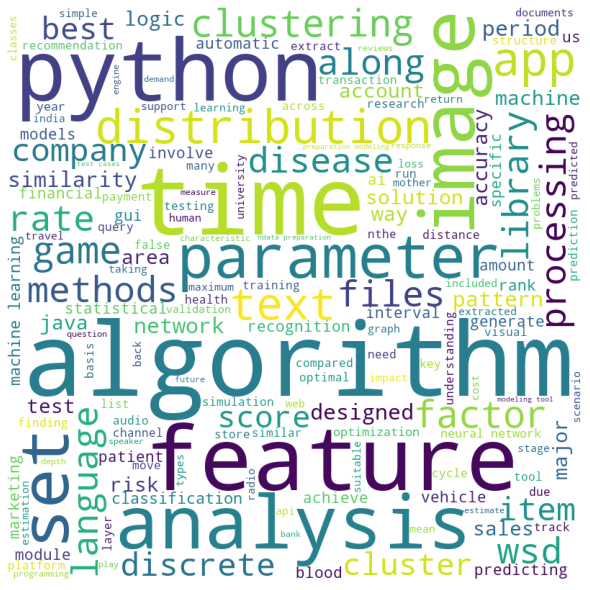

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

90

In [ ]:
list4

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'analyzing millions financial fraudulent hand audit analytics platform leveraged collect erps rules features extraction engine rules customizable client predictive models features',
 'clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top designing scripts get erps etl scripts transform understanding business problems crating interactive exploration visualization templates feature engineering training anomaly algorithms',
 'email address tracked many teams often cause delay email assigned wrong manually assigning sophisticated text mining pipeline python rapidminer easticnet adaboost algorithms tfidf partial pca featur

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
8               analysis  0.050132
64              features  0.049498
4             algorithms  0.044209
149               python  0.044182
156           regression  0.043279
141           predicting  0.042193
108               models  0.042152
90              learning  0.041330
152               random  0.040374
91                  like  0.039163
165                  set  0.037257
27        classification  0.036965
0               accuracy  0.036946
153        random forest  0.035383
68                forest  0.035383
100              machine  0.032808
61               feature  0.032218
101     machine learning  0.032150
28            classifier  0.031532
97              logistic  0.030827
98   logistic regression  0.030827
196        visualization  0.030215
142           prediction  0.029953
170                stock  0.029191
187                 tree  0.028585
173                  svm  0.028315
19                 bayes  0.027825
42              decision  0.027589
32              cleaning  0.027516
145                price  0.026910

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 1
Frequency of telecom is : 2
Frequency of firm is : 2
Frequency of predictive is : 4
Frequency of models is : 20
Frequency of risk is : 7
Frequency of churn is : 6
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 1
Frequency of generate is : 4
Frequency of tagging is : 2
Frequency of churned is : 2
Frequency of service is : 1
Frequency of usage is : 3
Frequency of also is : 4
Frequency of strong is : 1
Frequency of analyzing is : 1
Frequency of millions is : 1
Frequency of financial is : 7
Frequency of fraudulent is : 3
Frequency of hand is : 1
Frequency of audit is : 2
Frequency of analytics is : 7
Frequency of platform is : 2
Frequency of leveraged is : 1
Frequency of collect is : 4
Frequency of erps is : 4
Frequency of rules is : 2
Frequency of features is : 24
Frequency of extraction is : 3
Frequency of engine is : 1
Frequency of customizable is : 1
Frequency of client is : 4
Frequency of clien

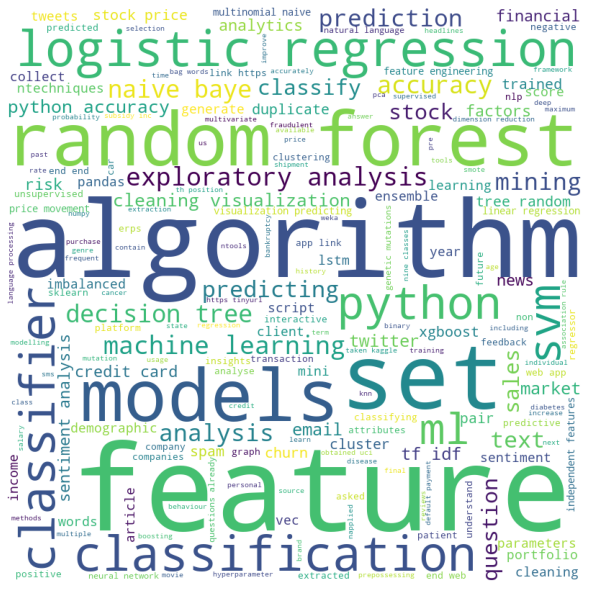

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

70

In [ ]:
list5

['algorithm dynamic maze moving obstacles path source destination',
 'autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition',
 'designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'analysis naphtha cracking obtained haldia petrochemical dimensionality reduction pca digital analog naphtha cracking processand suggested installation monitoring sensors collection black box optimi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
61              image  0.070798
2           algorithm  0.055523
104             robot  0.051244
94         processing  0.049342
21                car  0.044829
29            control  0.043213
4            analysis  0.041097
5             android  0.039398
13         autonomous  0.039386
122              time  0.038578
77             module  0.037701
62   image processing  0.036478
73             matlab  0.032816
23            channel  0.029760
114         simulated  0.029561
87               path  0.027740
110           sensors  0.027670
9             arduino  0.027545
85           obstacle  0.027316
86             opencv  0.027249
40             driver  0.027158
113            simple  0.026914
8                 app  0.026815
106               ros  0.025819
116             smart  0.025673
95          processor  0.024989
41            driving  0.024979
50               fpga  0.024860
52           gestures  0.024761
90           platform  0.024547

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of algorithm is : 16
Frequency of dynamic is : 3
Frequency of maze is : 2
Frequency of moving is : 1
Frequency of obstacles is : 2
Frequency of path is : 6
Frequency of source is : 3
Frequency of destination is : 1
Frequency of autonomous is : 12
Frequency of humanoid is : 2
Frequency of agents is : 1
Frequency of playing is : 3
Frequency of soccer is : 2
Frequency of intelligently is : 1
Frequency of simulated is : 6
Frequency of nenvironment is : 1
Frequency of following is : 5
Frequency of physics is : 1
Frequency of rule is : 1
Frequency of optimized is : 1
Frequency of like is : 4
Frequency of walking is : 1
Frequency of kicking is : 1
Frequency of factor is : 1
Frequency of x is : 4
Frequency of evolutionary is : 2
Frequency of strategies is : 1
Frequency of cma is : 1
Frequency of es is : 1
Frequency of ever is : 2
Frequency of simspark is : 1
Frequency of gym is : 1
Frequency of openai is : 1
Frequency of rl is : 1
Frequency of nalgorithms is : 1
Frequency of trpo is 

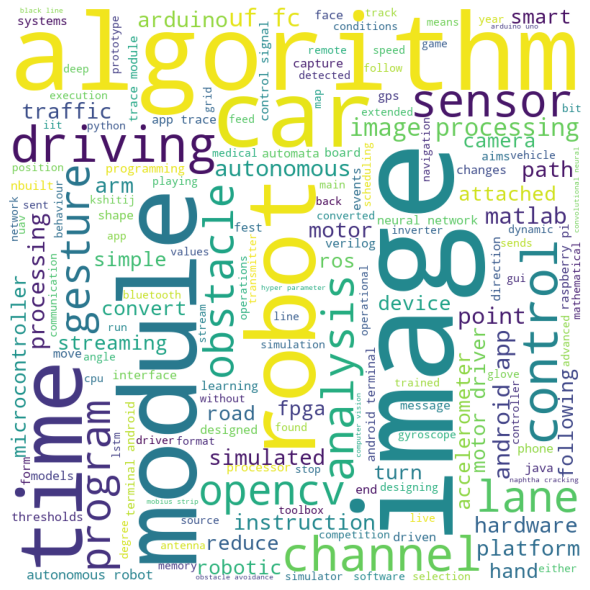

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 